In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 300
import math
import datetime as dt
import itertools
import random
import scipy.stats as stats

# Figure 2 v2

In [2]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 300
import math
import datetime as dt
import itertools
import random
import scipy.stats as stats

In [3]:
df_m2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/01.MIMICIV_SAKI_trajCluster/result/MIMIC_renal_recovery_2.csv")
df_a2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/02.AUMCdb_SAKI_trajCluster/result/AUMCdb_renal_recovery_2.csv")
df_e2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/03.eICU_SAKI_trajCluster/result/eICU_renal_recovery_2.csv")
df_merge = pd.concat([df_m2,df_a2,df_e2],axis=0)
df_merge["type"] = df_merge["stayid_state"] 
df_merge 

,groupHPD,stayid_state,stay_id,count_all,percent(%),dataset,type
0,1,Persistent AKI with full renal recovery,398,1298,30.66,MIMIC,Persistent AKI with full renal recovery
1,1,Persistent AKI with partial renal recovery,244,1298,18.80,MIMIC,Persistent AKI with partial renal recovery
2,1,Persistent AKI with worsening renal function,311,1298,23.96,MIMIC,Persistent AKI with worsening renal function
3,1,Rapidly revered AKI,337,1298,25.96,MIMIC,Rapidly revered AKI
4,2,Persistent AKI with full renal recovery,684,3055,22.39,MIMIC,Persistent AKI with full renal recovery
5,2,Persistent AKI with partial renal recovery,409,3055,13.39,MIMIC,Persistent AKI with partial renal recovery
6,2,Persistent AKI with worsening renal function,597,3055,19.54,MIMIC,Persistent AKI with worsening renal function
7,2,Rapidly revered AKI,1348,3055,44.12,MIMIC,Rapidly revered AKI
8,3,Persistent AKI with full renal recovery,50,360,13.89,MIMIC,Persistent AKI with full renal recovery
9,3,Persistent AKI with partial renal recovery,74,360,20.56,MIMIC,Persistent AKI with partial renal recovery


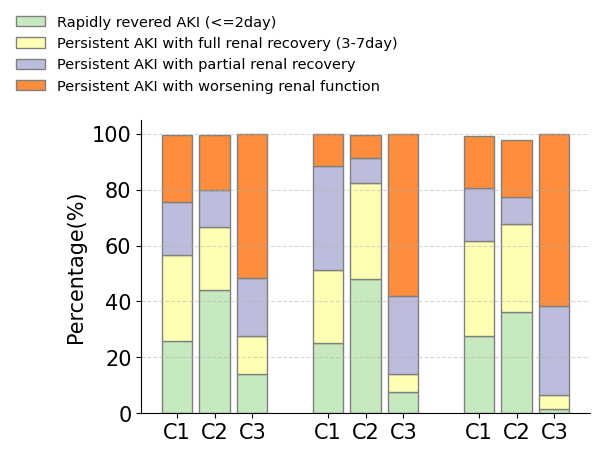

In [ ]:
df_out = df_merge
def text(y1,y2,y22,y32,y3,y4, sizes):
    plt.text(x[0],y1[0]/2 ,y1[0],size=sizes)
    plt.text(x[1],y1[1]/2,y1[1],size=sizes)
    plt.text(x[2],y1[2]/2,y1[2],size=sizes)
    
    plt.text(x[0],y1[0]+ y2[0]/2 ,y2[0],size=sizes)
    plt.text(x[1],y1[1]+ y2[1]/2 ,y2[1],size=sizes)
    plt.text(x[2],y1[2]+ y2[2]/2 ,y2[2],size=sizes)
    
    plt.text(x[0],y1[0]+ y2[0] +y22[0]/2 ,y22[0],size=sizes)
    plt.text(x[1],y1[1]+ y2[1] +y22[1]/2 ,y22[1],size=sizes)
    plt.text(x[2],y1[2]+ y2[2] +y22[2]/2 ,y22[2],size=sizes)
    
    plt.text(x[0],y1[0]+ y2[0] +y22[0] + y32[0]/2,y32[0],size=sizes)
    plt.text(x[1],y1[1]+ y2[1] +y22[1] + y32[1]/2,y32[1],size=sizes)
    plt.text(x[2],y1[2]+ y2[2] +y22[2] + y32[2]/2,y32[2],size=sizes)

    plt.text(x[0],y1[0]+ y2[0] +y22[0]+ y32[0]+ y3[0]/2 ,y3[0],size=sizes)
    plt.text(x[1],y1[1]+ y2[1] +y22[1]+ y32[1]+ y3[1]/2 ,y3[1],size=sizes)
    plt.text(x[2],y1[2]+ y2[2] +y22[2]+ y32[2]+ y3[2]/2 ,y3[2],size=sizes)
    
    plt.text(x[0],y1[0]+ y2[0] +y22[0]+ y32[0]+ y3[0]+ y4[0]/2,y4[0],size=sizes)
    plt.text(x[1],y1[1]+ y2[1] +y22[1]+ y32[1]+ y3[1]+ y4[1]/2,y4[1],size=sizes)
    plt.text(x[2],y1[2]+ y2[2] +y22[2]+ y32[2]+ y3[2]+ y4[2]/2,y4[2],size=sizes)
    
y1 = df_out[df_out["type"]=="Rapidly revered AKI"]["percent(%)"].tolist()
y2 = df_out[df_out["type"]=="Persistent AKI with full renal recovery"]["percent(%)"].tolist()
y22 = df_out[df_out["type"]=="Persistent AKI with partial renal recovery"]["percent(%)"].tolist()
y32 = df_out[df_out["type"]=="Persistent AKI with worsening renal function"]["percent(%)"].tolist()
#y3 = df_out[df_out["type"]=="Persistent AKI with steady renal function"]["percent(%)"].tolist()

x = [1,1.5,2,3,3.5,4,5,5.5,6]
y1 = np.array(y1)
y2 = np.array(y2)
y22 = np.array(y22)
y32 = np.array(y32)
#y3 = np.array(y3)

size =15
plt.figure(figsize=(6, 5))
plt.bar(x,y1,width=0.4,label='Rapidly revered AKI (<=2day)',color='#c7e9c0',edgecolor='grey')
plt.bar(x,y2,width=0.4,bottom=y1,label='Persistent AKI with full renal recovery (3-7day)',color='#ffffb3',edgecolor='grey')
plt.bar(x,y22,width=0.4,bottom=y1+y2,label='Persistent AKI with partial renal recovery',color='#bcbddc',edgecolor='grey')
plt.bar(x,y32,width=0.4,bottom=y1+y2+y22,label='Persistent AKI with worsening renal function',color='#fd8d3c',edgecolor='grey')
#plt.bar(x,y3,width=0.4,bottom=y1+y2+y22+y32,label='Persistent AKI with worsening renal function',color='#fd8d3c',edgecolor='grey')

#text(y1,y2,y3,y4,10)
plt.xticks(x,["C1","C2","C3","C1","C2","C3","C1","C2","C3"],fontsize=size)
plt.yticks(fontsize=size)
plt.grid(axis='y',alpha=0.5,ls='--')

plt.legend(ncol=1,loc=1,frameon=False,bbox_to_anchor=(0.6,1.4),fontsize=10.5)
plt.ylabel("Percentage(%)",fontsize=size)
plt.tight_layout()
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('recovery_type.pdf', bbox_inches = 'tight')
plt.show()

# renal recovery extent

In [5]:
df_m2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/01.MIMICIV_SAKI_trajCluster/result/MIMIC_renal_recovery_extent.csv")
df_a2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/02.AUMCdb_SAKI_trajCluster/result/AUMCdb_renal_recovery_extent.csv")
df_e2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/03.eICU_SAKI_trajCluster/result/eICU_renal_recovery_extent.csv")
df_merge = pd.concat([df_m2,df_a2,df_e2],axis=0)
df_merge["type"] = df_merge["stayid_state"] 
df_rr_extent = df_merge 

fixed_order1 = ['eICU', 'AUMCdb', 'MIMIC']
fixed_order2 = [3,1,2]
df_rr_extent['dataset'] = pd.Categorical(df_rr_extent['dataset'], categories=fixed_order1, ordered=True)
df_rr_extent['groupHPD'] = pd.Categorical(df_rr_extent['groupHPD'], categories=fixed_order2, ordered=True)
df_rr_extent_sorted = df_rr_extent.sort_values(by=['dataset', 'groupHPD'])

Full renal recovery [6.4, 62.14, 69.18, 14.16, 51.24, 82.29, 27.78, 56.63, 66.51]
Partial renal recovery [32.0, 19.05, 9.76, 27.85, 37.06, 9.0, 20.56, 18.8, 13.39]
Worsening renal function [61.6, 18.81, 21.06, 57.99, 11.7, 8.29, 51.67, 23.96, 19.54]


<ipython-input-6-07df467371f6>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


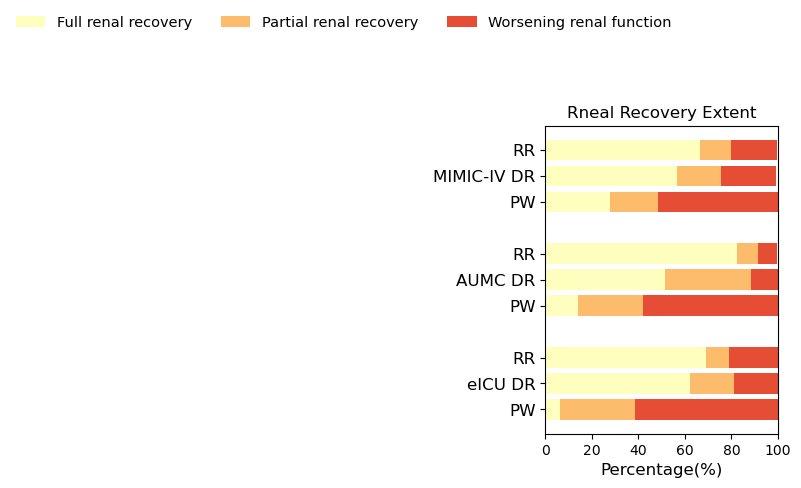

In [ ]:
df_out = df_rr_extent_sorted  

# Distribution of AKI grades at the time of diagnosis in the three groups
y1 = df_out[df_out["type"]=="Full renal recovery"]["percent(%)"].tolist()
y2 = df_out[df_out["type"]=="Partial renal recovery"]["percent(%)"].tolist()
y3 = df_out[df_out["type"]=="Worsening renal function"]["percent(%)"].tolist()
print("Full renal recovery",y1)
print("Partial renal recovery",y2)
print("Worsening renal function",y3)

x = [1,1.5,2,3,3.5,4,5,5.5,6]
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

size =12
text_size = 8
plt.figure(figsize=(3, 4))
p1=plt.barh(x,y1,label='Full renal recovery',color='#feffbe',height=0.4 )
p2 = plt.barh(x,y2, left=y1,label='Partial renal recovery',color='#fdbb6c',height=0.4)
p3 = plt.barh(x,y3, left=[i + j for i, j in zip(y1, y2)],label='Worsening renal function',color='#e54e35',height=0.4)

# plt.bar_label(p1, label_type='center', color="darkgrey", fontsize='7', fmt='%.1f')
# plt.bar_label(p2, label_type='center', color="white", fontsize='7', fmt='%.1f')
# plt.bar_label(p3, label_type='center', color="white", fontsize='7', fmt='%.1f')

plt.yticks(x,["PW", "eICU DR","RR", "PW","AUMC DR","RR","PW", "MIMIC-IV DR","RR"],fontsize=size)
plt.yticks(fontsize=size)
plt.xlim(0, 100)

plt.legend(ncol=3,loc=1,frameon=False,bbox_to_anchor=(0.6,1.4),fontsize=10.5)
plt.xlabel("Percentage(%)",fontsize=size)
plt.tight_layout()
plt.title("Rneal Recovery Extent")

plt.savefig('recovery_type_extent.pdf', bbox_inches = 'tight')
plt.show()

# renal recovery time

In [7]:
df_m2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/01.MIMICIV_SAKI_trajCluster/result/MIMIC_renal_recovery_time.csv")
df_a2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/02.AUMCdb_SAKI_trajCluster/result/AUMCdb_renal_recovery_time.csv")
df_e2 = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/03.eICU_SAKI_trajCluster/result/eICU_renal_recovery_time.csv")
df_merge = pd.concat([df_m2,df_a2,df_e2],axis=0)
df_merge["type"] = df_merge["stayid_state"] 
df_rr_time = df_merge 

fixed_order1 = ['eICU', 'AUMCdb', 'MIMIC']
fixed_order2 = [3,1,2]
df_rr_time['dataset'] = pd.Categorical(df_rr_time['dataset'], categories=fixed_order1, ordered=True)
df_rr_time['groupHPD'] = pd.Categorical(df_rr_time['groupHPD'], categories=fixed_order2, ordered=True)
df_rr_time_sorted = df_rr_time.sort_values(by=['dataset', 'groupHPD'])


Persistent AKI [98.4, 72.14, 62.82, 92.24, 74.82, 51.5, 86.11, 73.42, 55.32]
Transient AKI [1.6, 27.86, 37.18, 7.76, 25.18, 48.07, 13.89, 25.96, 44.12]


<ipython-input-8-50ddef2f6361>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


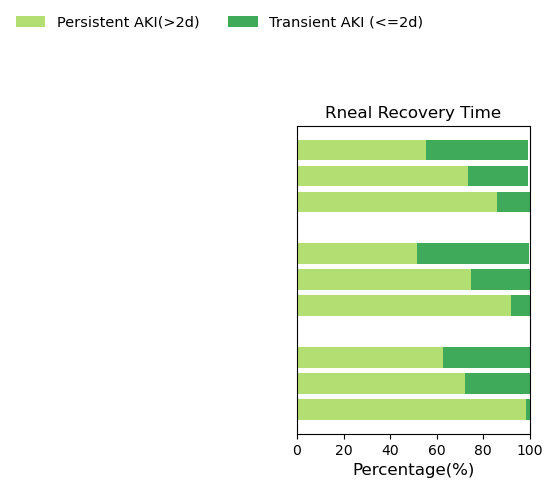

In [ ]:
df_out = df_rr_time_sorted  

# Distribution of AKI grades at the time of diagnosis in the three groups
y1 = df_out[df_out["type"]=="Persistent AKI"]["percent(%)"].tolist()
y2 = df_out[df_out["type"]=="Transient AKI"]["percent(%)"].tolist()
print("Persistent AKI",y1)
print("Transient AKI",y2)

x = [1,1.5,2,3,3.5,4,5,5.5,6]
y1 = np.array(y1)
y2 = np.array(y2)

size =12
plt.figure(figsize=(3, 4))
p1 = plt.barh(x,y1,label='Persistent AKI(>2d)',color='#b3df72', height=0.4 )
p2 = plt.barh(x,y2, left=y1,label='Transient AKI (<=2d)',color='#3faa59', height=0.4)
# plt.bar_label(p1, label_type='center', color="white", fontsize='7', fmt='%.1f')
# plt.bar_label(p2, label_type='center', color="white", fontsize='7', fmt='%.1f')

#plt.yticks(x,["RR", "eICU PW","DR", "RR","AUMC DR","PW","RR", "MIMIC-IV DR","PW"],fontsize=size)
plt.yticks([])
plt.yticks(fontsize=size)
plt.xlim(0, 100)

plt.legend(ncol=2,loc=1,frameon=False,bbox_to_anchor=(0.6,1.4),fontsize=10.5)
plt.xlabel("Percentage(%)",fontsize=size)
plt.tight_layout()
plt.title("Rneal Recovery Time")

plt.savefig('recovery_type_time.pdf', bbox_inches = 'tight')
plt.show()